<h2><center>MNIST classification using <i>LeNet300</i></center></h2>


# Importing Keras

In [1]:
# Importing the Keras 2.x main module relying on tensorflow 2.x backend
import tensorflow as tf
import keras
print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.14.0
Using keras version 2.14.0


# Loading and preparing the MNIST dataset
Load the MNIST dataset made available by keras.datasets
Verify the amount of system memory available before and after loading the dataset.

In [2]:
#@title
# The MNSIT dataset is ready to be imported from Keras into RAM
from keras.datasets import mnist
# START CODE HERE
!free -h
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
!free -h
print(train_labels.shape)
print(train_images.shape)
# END CODE HERE

               total        used        free      shared  buff/cache   available
Mem:            12Gi       819Mi       7.9Gi        26Mi       3.9Gi        11Gi
Swap:             0B          0B          0B
               total        used        free      shared  buff/cache   available
Mem:            12Gi       886Mi       7.9Gi        26Mi       3.9Gi        11Gi
Swap:             0B          0B          0B
(60000,)
(60000, 28, 28)


Using the pyplot package, visualize the fist sample of the training set

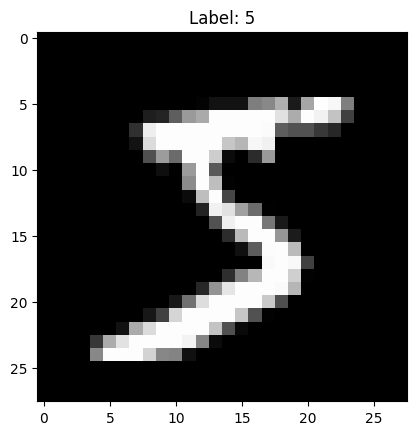

In [3]:
# Let us visualize the first training sample using the Gnuplot library
from matplotlib import pyplot as plt
# START CODE HERE
def test():
  plt.imshow(train_images[0], cmap='gray')  # Assuming grayscale images
  plt.title(f"Label: {train_labels[0]}")  # Assuming labels are available
  plt.show()
test()
# END CODE HERE

Turn train and test labels to one-hot encoding

In [4]:
from keras.utils import to_categorical
# START CODE HERE
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
# END CODE HERE

Reshape train and test images so that they follow the NWHC ordering required by the TF backend.
Then, after casting the pixels to floats, normalize the images so that they have zero-mean and unitary deviation

In [5]:
import numpy as np
# Reshape to proper images with 1 color channel according to backend scheme

# START CODE HERE
print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)
img_rows, img_cols = train_images.shape[1], train_images.shape[2]

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
# END CODE HERE

# Cast pixels from uint8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Now let us normalize the images so that they have zero mean and standard deviation
# Hint: testing data statistics known at training time ?
# START CODE HERE

# Normalize the images to have zero-mean and unitary deviation
mean = np.mean(train_images)
std = np.std(train_images)
train_images = (train_images - mean) / std
test_images = (test_images - mean) / std

# Print the shape of the reshaped and normalized images
print("Shape of train_images:", train_images.shape)
print("Shape of test_images:", test_images.shape)
# END CODE HERE

Shape of train_images: (60000, 28, 28)
Shape of test_images: (10000, 28, 28)
Shape of train_images: (60000, 28, 28, 1)
Shape of test_images: (10000, 28, 28, 1)


# Defining the neural network architecture (i.e., the network model)

Create a LeNet300-like fully connected network taking in input the images as vectors of pixels and suitable to classify each image across 10 different classes. For this first implementation of the network, use only sigmoid activations in the hidden layer. Which activation function shall be used for the output layer ?

In [6]:
# The Sequential module is a container for more complex NN elements and
# defines a loop-less NN architecture
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

# START CODE HERE
input_shape = (img_rows, img_cols, 1)
output_shape = 10

model = Sequential()

model.add(Flatten(input_shape = input_shape))
model.add(Dense(300, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(output_shape, activation='softmax')) #output 10 digit

model.summary()
# END CODE HERE

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Instantiate a SGD optimizer with a tentative LR of 10^-4 and using the appropriate loss function and compile the model.

In [7]:
# The optimizers module provides a number of optimization algorithms for updating
# a netwok parameters accoridng to the computed error gradints
# START CODE HERE
optimizer=tf.keras.optimizers.SGD(learning_rate=1e-2)

# Compiling a model in Keras amounts to associating th eoptimizer to a model with an appropriate loss function
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# END CODE HERE
# We can now have a look at the defined model topology
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training the network

Train the model for 10 epochs using the fit() method, without batch training initially validating the model at each epoch and keeping track of the training history for later plotting. Make sure you enable fit() verbose mode for interactive output.

In [8]:
# This is where the actual training-testing happens
# Number of epochs we want to train
epochs = 10

# START CODE HERE
batch_size = 32
history = model.fit(train_images, train_labels,
            batch_size=batch_size, epochs=epochs,
            verbose=1, shuffle=True, validation_data=(test_images, test_labels))
# END CODE HERE

Epoch 1/10
1875/1875 [==============================] - 22s 10ms/step - loss: 1.4618 - accuracy: 0.6920 - val_loss: 0.8081 - val_accuracy: 0.8401
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6251 - accuracy: 0.8628 - val_loss: 0.4866 - val_accuracy: 0.8855
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4449 - accuracy: 0.8868 - val_loss: 0.3889 - val_accuracy: 0.8983
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3764 - accuracy: 0.8981 - val_loss: 0.3422 - val_accuracy: 0.9065
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3392 - accuracy: 0.9047 - val_loss: 0.3142 - val_accuracy: 0.9132
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3142 - accuracy: 0.9111 - val_loss: 0.2933 - val_accuracy: 0.9182
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2954 - accuracy: 0.9154 - val_loss: 0.2781 - val_accur

# Visualizing the network performance
Visualize the training history using the pyplot package: plot in one graph the train and vaidation loss functions, in another graph the train and validation accuracy. By comparing the training the testing curves, what can we conclude about the quality of the training ?

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


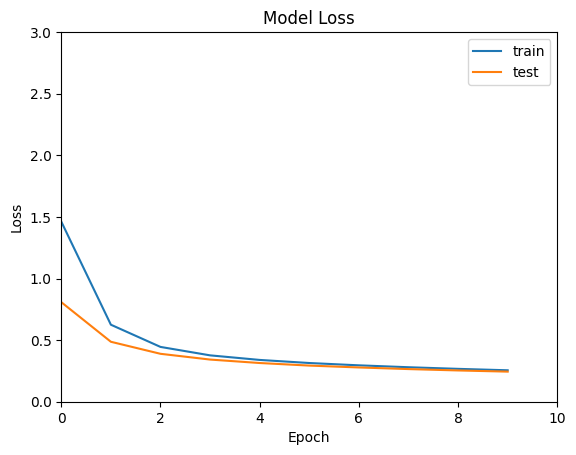

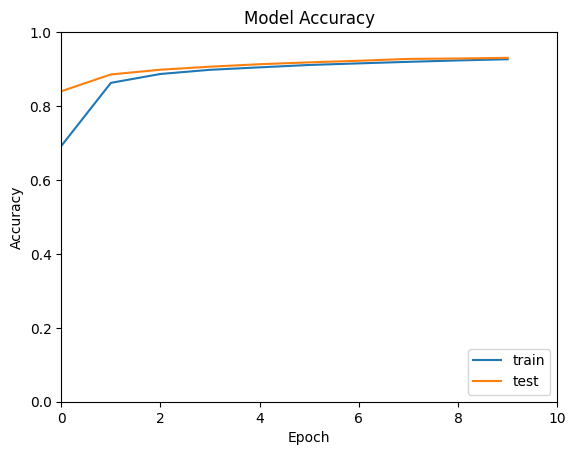

In [9]:
# We now want to plot the train and validation loss functions and accuracy curves
print(history.history.keys())

# summarize history for loss
# START CODE HERE
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.ylim(top=3)
plt.ylim(bottom=0)
plt.xlabel('Epoch')
plt.xlim(left=0)
plt.xlim(right=10)
plt.legend(['train', 'test'], loc='upper right')
# END CODE HERE
plt.show()

# summarize history for accuracy
# START CODE HERE
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(top=1)
plt.ylim(bottom=0)
plt.xlabel('Epoch')
plt.xlim(left=0)
plt.xlim(right=10)
plt.legend(['train', 'test'], loc='lower right')
# END CODE HERE
plt.show()


# Computing the confusion matrix
The confusion matrix allows to analyze the trained network performance on a per-class basis

In [10]:
# Example of a confusion matrix using sklearn.metrics
from sklearn.metrics import confusion_matrix
predictions = model.predict(test_images)
# Mind that confusion_matrix requires
matrix = confusion_matrix(test_labels.argmax(axis=1), predictions.argmax(axis=1))
print (matrix)

313/313 [==============================] - 1s 2ms/step
[[ 963    0    2    2    0    3    8    1    1    0]
 [   0 1112    2    2    0    2    4    1   12    0]
 [  13    4  944   11   13    2   13   10   19    3]
 [   2    1   19  937    0   18    3   14   10    6]
 [   1    4    4    0  930    0   11    2    3   27]
 [   7    3    3   43    6  781   14    8   19    8]
 [  13    3    6    1   10    9  912    1    3    0]
 [   3   10   26    6    7    0    0  943    0   33]
 [   5    6    7   21   12   25   11   12  864   11]
 [  12    7    1   10   36    7    1   13    4  918]]


# Experiments

Note down the performance of the trained network in terms of training and validation accuracy as a reference (save the loss/accuracy graphs of the trained network).

Then,  experiment as follow and compare performance with the reference scenario:

*  Experiment increasing the batch size (from purely stochastic case) and compare performance with reference.
*  Experiment gradually increasing the learning rate starting from 10^-4 and find a reasonable learning rate value the network can tolerate without diverging.
*  Experiment replacing the sigmoid activations with Relus and note what happens.




